# 2017 US Bike Share Data Analysis

## Table of contents

* Introduction
* Questions to be answered
* Data cleaning
    1. Missing values
    2. Reformat variables
* Exploratory Data Analysis
* Visualization
    1. Chicago
    2. New York City
* Conclusion

### Introduction

The data for this analysis is from `Motivate`, a global bike share operator that has bike share program in Washington, DC, Boston, New York, San Francisco, Columbus, OH, Portland, and Chicago. 

For this analysis, I am interested in studying the behavior difference in user type between riders in `Chicago` and `New York City`.

**Variables**:

- Trip duration: in seconds
- User type: 
    - Customer: Single rider, those without an annual membership.
    - Subscribers: Annual membership holders
- Genders
- Birth year
- Month, Weekday and Hour extracted from Start time


### Questions to be answered:

**Goal** of this analysis is to see if there’s any behavior difference between subscriber and customers.

1. What is the average trip duration for each user type in both cities? 
2. Does trip duration for each user type differs based on gender? month? day of the week? hour? birth year?

The answer can be found under EDA and Visualization section.

**Load packages and data**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
chicago = pd.read_csv("chicago.csv")
nyc = pd.read_csv('new_york_city.csv')

In [3]:
chicago.head(2)

,Start Time,End Time,Trip Duration,Start Station,End Station,User Type,Gender,Birth Year
0,2017-01-01 00:00:36,2017-01-01 00:06:32,356,Canal St & Taylor St,Canal St & Monroe St (*),Customer,NaN,NaN
1,2017-01-01 00:02:54,2017-01-01 00:08:21,327,Larrabee St & Menomonee St,Sheffield Ave & Kingsbury St,Subscriber,Male,1984.0


In [4]:
nyc.head(2)

,Start Time,End Time,Trip Duration,Start Station,End Station,User Type,Gender,Birth Year
0,2017-01-01 00:00:21,2017-01-01 00:11:41,680,W 82 St & Central Park West,Central Park West & W 72 St,Subscriber,Female,1965.0
1,2017-01-01 00:00:45,2017-01-01 00:22:08,1282,Cooper Square & E 7 St,Broadway & W 32 St,Subscriber,Female,1987.0


In [5]:
chicago.shape

(1551505, 8)

In [6]:
nyc.shape

(6816254, 8)

### Data cleaning

#### 1. Missing data:

Important questions when thinking about missing data:

- How prevalent is the missing data?
- Is missing data random or does it have a pattern?

For `Chicago` dataset, `Gender` and `Birth Year` are both missing a little over 20% of the data.

For `NYC` dataset, `Gender`, `Birth Year`, `User Type` all have missing values, for less than 10% of the data.

Further examining the data, we see that missing values from both dataset mostly comes from users who are customers. 

In [11]:
total = chicago.isnull().sum().sort_values(ascending = False)
percent = (chicago.isnull().sum()/chicago.isnull().count()).sort_values(ascending = False)
pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])

,Total,Percent
Gender,316867,0.204232
Birth Year,316683,0.204113
User Type,0,0.000000
End Station,0,0.000000
Start Station,0,0.000000
Trip Duration,0,0.000000
End Time,0,0.000000
Start Time,0,0.000000


In [12]:
total = nyc.isnull().sum().sort_values(ascending = False)
percent = (nyc.isnull().sum()/nyc.isnull().count()).sort_values(ascending = False)
pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])

,Total,Percent
Gender,668105,0.098016
Birth Year,645172,0.094652
User Type,15909,0.002334
End Station,0,0.000000
Start Station,0,0.000000
Trip Duration,0,0.000000
End Time,0,0.000000
Start Time,0,0.000000


In [14]:
# Chicago missing data, user type break down
a = chicago[chicago.isnull().any(axis=1)]
a['User Type'].value_counts()

Customer      316683
Subscriber       184
Name: User Type, dtype: int64

In [19]:
# NYC missing data, user type break down
b = nyc[nyc.isnull().any(axis=1)]
b['User Type'].value_counts()

Customer      587489
Subscriber     80496
Name: User Type, dtype: int64

Since missing values are very tiny part of the observation, and I do want to examine Birth year and Gender of the riders, I will delete the missing values.

In [26]:
# Drop missing values:
chicago = chicago.dropna()
nyc = nyc.dropna()

In [28]:
chicago.shape

(1234638, 8)

In [29]:
nyc.shape

(6132360, 8)

#### 2. Reformat variable

In [31]:
# Time
# Extract month, weekday, hour from start time

# Chicago:
chicago['starttime'] = pd.to_datetime(chicago['Start Time'])
chicago['month'] = chicago['starttime'].dt.month
chicago['weekday'] = chicago['starttime'].dt.weekday_name
chicago['hour'] = chicago['starttime'].dt.hour

# New York:
nyc['starttime'] = pd.to_datetime(nyc['Start Time'])
nyc['month'] = nyc['starttime'].dt.month
nyc['weekday'] = nyc['starttime'].dt.weekday_name
nyc['hour'] = nyc['starttime'].dt.hour

In [32]:
# Trip Duration
# For Chicago and NYC, trip duration is measured in seconds, let's convert back to minutes

# Chicago
chicago['tripduration'] = chicago['Trip Duration']/60
chicago['tripduration'] = chicago['tripduration'].round(2)

# NYC
nyc['tripduration'] = nyc['Trip Duration']/60
nyc['tripduration'] = nyc['tripduration'].round(2)

In [34]:
# Let's also drop `User Type` = `Dependent`, since there is only 4 of them for ease of comparison
chicago.drop(chicago[chicago['User Type']=='Dependent'].index, inplace= True)

In [35]:
chicago['User Type'].value_counts()

Subscriber    1234155
Customer          479
Name: User Type, dtype: int64

In [36]:
nyc['User Type'].value_counts()

Subscriber    6033876
Customer        98484
Name: User Type, dtype: int64

In [38]:
chicago.head(3)

,Start Time,End Time,Trip Duration,Start Station,End Station,User Type,Gender,Birth Year,starttime,month,weekday,hour,tripduration
1,2017-01-01 00:02:54,2017-01-01 00:08:21,327,Larrabee St & Menomonee St,Sheffield Ave & Kingsbury St,Subscriber,Male,1984.0,2017-01-01 00:02:54,1,Sunday,0,5.45
2,2017-01-01 00:06:06,2017-01-01 00:18:31,745,Orleans St & Chestnut St (NEXT Apts),Ashland Ave & Blackhawk St,Subscriber,Male,1985.0,2017-01-01 00:06:06,1,Sunday,0,12.42
3,2017-01-01 00:07:28,2017-01-01 00:12:51,323,Franklin St & Monroe St,Clinton St & Tilden St,Subscriber,Male,1990.0,2017-01-01 00:07:28,1,Sunday,0,5.38


In [39]:
nyc.head(3)

,Start Time,End Time,Trip Duration,Start Station,End Station,User Type,Gender,Birth Year,starttime,month,weekday,hour,tripduration
0,2017-01-01 00:00:21,2017-01-01 00:11:41,680,W 82 St & Central Park West,Central Park West & W 72 St,Subscriber,Female,1965.0,2017-01-01 00:00:21,1,Sunday,0,11.33
1,2017-01-01 00:00:45,2017-01-01 00:22:08,1282,Cooper Square & E 7 St,Broadway & W 32 St,Subscriber,Female,1987.0,2017-01-01 00:00:45,1,Sunday,0,21.37
5,2017-01-01 00:01:51,2017-01-01 00:12:57,666,Central Park West & W 68 St,Central Park West & W 68 St,Subscriber,Male,2000.0,2017-01-01 00:01:51,1,Sunday,0,11.10


In [40]:
# Drop columns not necessary for analysis

chicago.drop(['Start Time', 'End Time', 'Trip Duration', 'Start Station', 'End Station', 'starttime'], axis = 1, inplace = True)
nyc.drop(['Start Time', 'End Time', 'Trip Duration', 'Start Station', 'End Station', 'starttime'], axis = 1, inplace = True)

In [ ]:
# write remaining columns to new csv

chicago.to_csv('chicago2.csv', index = False)
nyc.to_csv('nyc2.csv', index = False)

In [2]:
# Read in edited data

chicago = pd.read_csv("chicago2.csv")
nyc = pd.read_csv("nyc2.csv")

In [3]:
chicago.head()

,User Type,Gender,Birth Year,month,weekday,hour,tripduration
0,Subscriber,Male,1984.0,1,Sunday,0,5.45
1,Subscriber,Male,1985.0,1,Sunday,0,12.42
2,Subscriber,Male,1990.0,1,Sunday,0,5.38
3,Subscriber,Male,1990.0,1,Sunday,0,12.93
4,Subscriber,Male,1970.0,1,Sunday,0,10.72


In [4]:
nyc.head()

,User Type,Gender,Birth Year,month,weekday,hour,tripduration
0,Subscriber,Female,1965.0,1,Sunday,0,11.33
1,Subscriber,Female,1987.0,1,Sunday,0,21.37
2,Subscriber,Male,2000.0,1,Sunday,0,11.10
3,Subscriber,Male,1973.0,1,Sunday,0,9.32
4,Subscriber,Female,1977.0,1,Sunday,0,13.77


In [5]:
# Convert birth year to integer first to get rid of decimal point

chicago['Birth Year'] = chicago['Birth Year'].astype('int')
nyc['Birth Year'] = nyc['Birth Year'].astype('int')

In [6]:
# Convert variable to category
cols = ['User Type', 'Gender', 'month', 'weekday', 'hour']

# count of each user type
for col in cols:
    chicago[col] = chicago[col].astype('category')
    nyc[col] = nyc[col].astype('category')

In [7]:
# Change all column names to lower case

chicago.columns = chicago.columns.str.lower()
nyc.columns = nyc.columns.str.lower()

### Exploratory Data Analysis

Let's focus on examining the pattern between subscribers and short-term customers for both location

- What is the average trip duration for each user type in both cities?

Average trip duration for `Chicago` for customer is 14.42 minute, for subscriber is 11.66 minutes. Average trip duation for `NYC` for customer is 60.34 minutes, for subscriber is 13.47 minutes.

In [8]:
# Get rid of scientific notation
pd.options.display.float_format = '{:.2f}'.format

In [9]:
chicago.groupby('user type').describe().transpose()

user type           Customer  Subscriber
birth year   count    479.00  1234155.00
             mean    1980.64     1980.86
             std        7.15       10.99
             min     1957.00     1899.00
             25%     1978.00     1975.00
             50%     1978.00     1984.00
             75%     1985.00     1989.00
             max     1997.00     2016.00
tripduration count    479.00  1234155.00
             mean      14.42       11.66
             std       25.99       17.14
             min        1.32        1.00
             25%        4.87        5.83
             50%        8.98        9.42
             75%       18.70       14.97
             max      507.82     1434.93

In [10]:
nyc.groupby('user type').describe().transpose()

user type           Customer  Subscriber
birth year   count  98484.00  6033876.00
             mean    1983.35     1978.20
             std       10.37       11.80
             min     1886.00     1885.00
             25%     1977.00     1970.00
             50%     1986.00     1981.00
             75%     1991.00     1988.00
             max     2001.00     2001.00
tripduration count  98484.00  6033876.00
             mean      60.34       13.47
             std     1101.64      191.74
             min        1.02        1.02
             25%       13.48        5.83
             50%       21.02        9.43
             75%       28.17       15.70
             max   154239.00   162265.80

### Visualization

**Chicago**

What is the average trip duration for each user type? By Gender? Month? Weekday? Hour?

* Looking at the following graph, Customer behavior shows a bigger variability among itself as oppose to Subscriber, regardless whether we break our data down by gender, month, weekday, hour, or birth year.

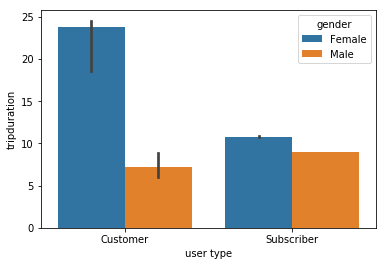

In [10]:
# Chicago
sns.barplot(x='user type', y = 'tripduration', hue = 'gender', estimator = np.median, data = chicago)

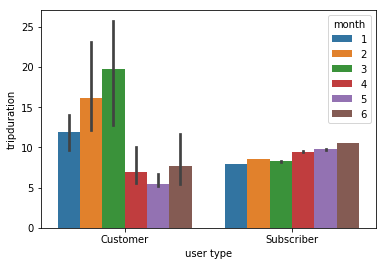

In [19]:
sns.barplot(x='user type', y = 'tripduration', hue = 'month', estimator = np.median, data = chicago)

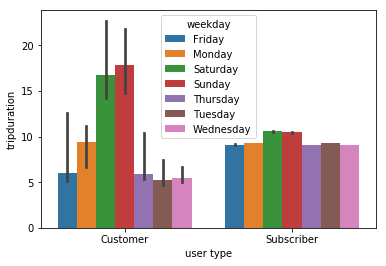

In [20]:
sns.barplot(x='user type', y = 'tripduration', hue = 'weekday', estimator = np.median, data = chicago)

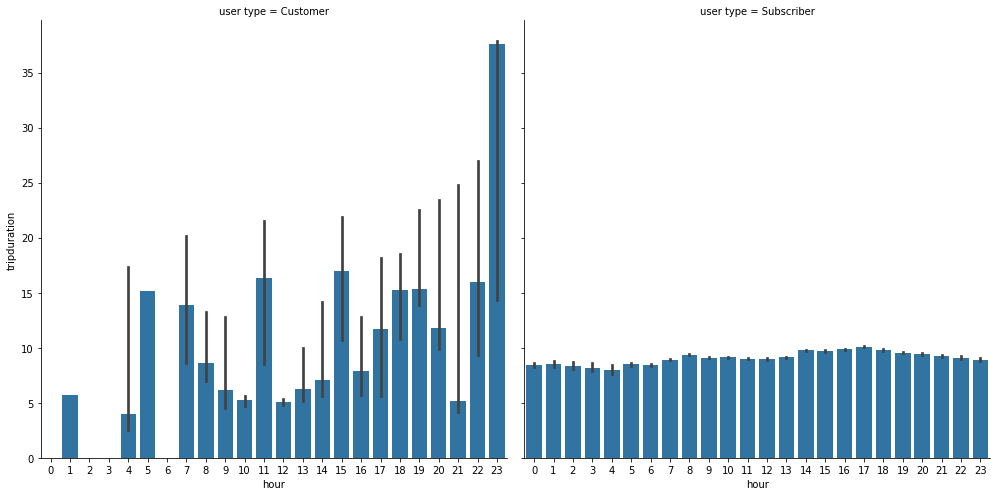

In [23]:
g = sns.FacetGrid(chicago, col = 'user type', size = 7, aspect = 1)
g.map(sns.barplot, "hour", "tripduration", estimator = np.median)

**New York City**

What is the average trip duration for each user type? By Gender? Month? Weekday? Hour? Age?

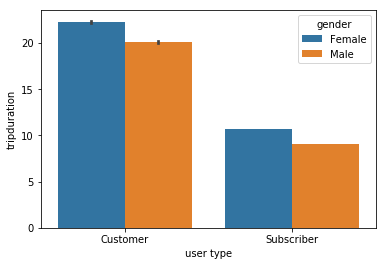

In [29]:
# NYC
sns.barplot(x='user type', y = 'tripduration', hue = 'gender', estimator = np.median, data = nyc)

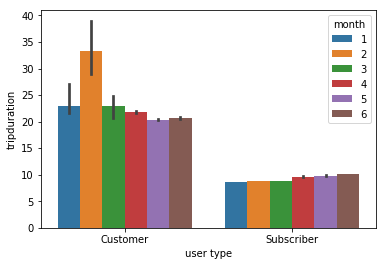

In [30]:
sns.barplot(x='user type', y = 'tripduration', hue = 'month', estimator = np.median, data = nyc)

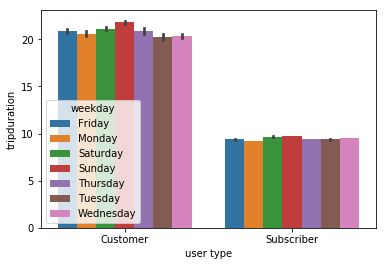

In [31]:
sns.barplot(x='user type', y = 'tripduration', hue = 'weekday', estimator = np.median, data = nyc)

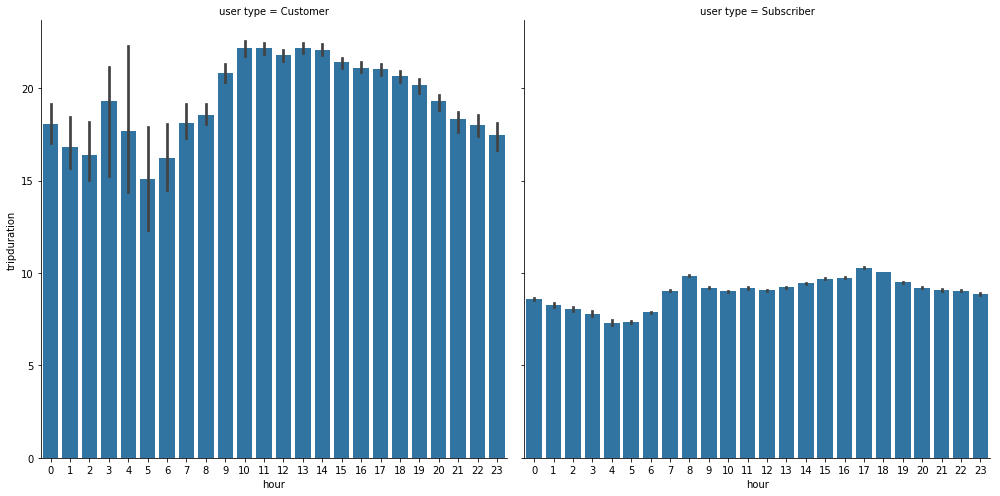

In [32]:
g = sns.FacetGrid(nyc, col = 'user type', size = 7, aspect = 1)
g.map(sns.barplot, "hour", "tripduration", estimator = np.median)

### Conclusion:

On average, customers uses the bike longer than subscribers in both cities. Trip duration for customers in New York is 4 times higher than duration for subscribers. This may due to the fact that NYC is a tourist heavy destination. 

In both cities, subscriber behavior is quite consistent across all the variables we look at: gender, month, day of the week and hour. Customer behavior on the other hand, shows a bigger variability. More customers ride bike in the weekend than subscribers in Chicago. This differences in not prevalent in New York.